## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [4]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,-1.232322,-1.079314,-0.669004,13.035309
1985-06,-1.232322,-1.084088,-0.669004,13.160484
1985-09,-1.232322,-1.081432,-0.669004,16.657703
1985-12,-1.232322,-1.007231,-0.669004,16.345213
1986-03,-1.232322,-1.013861,-0.669004,15.921562
1986-06,-1.232322,-1.022850,-0.669004,14.741072
1986-09,-1.232322,-1.047896,-0.669004,13.267827
1986-12,-1.232322,-1.079154,-0.669004,16.734827
1987-03,-1.232322,-1.005595,-0.669004,18.234604
1987-06,-1.232322,-0.973774,-0.669004,17.033018


## 2.2 Scaled y dataset evaluation

In [4]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'kernel': []
}
svr = GridSearchCV(SVR(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(rf, '{}_Manual_dataset.csv', PATH, stocks, 'svr', scaling=True)

{'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'}


In [4]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'kernel': ['linear'], #['linear', 'poly', 'rbf', 'sigmoid'],
    #'gamma': ['scale', 'auto']
    'C': [1.8000000000000003], #list(np.arange(0.1, 5, 0.1))
    'epsilon': [0.002], #list(np.arange(0.001, 1, 0.001)),

}
svr = GridSearchCV(SVR(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(svr, '{}_Manual_dataset_ns.csv', PATH, stocks, 'svr', scaling=True)

{'C': 1.8000000000000003, 'epsilon': 0.002, 'kernel': 'linear'} GridSearch fit on NSC 
RMSE mean: 4.720393980403961 
 MAPE mean: 0.09597168281900617 
 MAE mean: 3.004878943638276 


{'C': 1.8000000000000003, 'epsilon': 0.002, 'kernel': 'linear'} GridSearch fit on GL 
RMSE mean: 4.720393980403961 
 MAPE mean: 0.09597168281900617 
 MAE mean: 3.004878943638276 


{'C': 1.8000000000000003, 'epsilon': 0.002, 'kernel': 'linear'} GridSearch fit on PEP 
RMSE mean: 4.720393980403961 
 MAPE mean: 0.09597168281900617 
 MAE mean: 3.004878943638276 


{'C': 1.8000000000000003, 'epsilon': 0.002, 'kernel': 'linear'} GridSearch fit on BDX 
RMSE mean: 4.720393980403961 
 MAPE mean: 0.09597168281900617 
 MAE mean: 3.004878943638276 


{'C': 1.8000000000000003, 'epsilon': 0.002, 'kernel': 'linear'} GridSearch fit on IBM 
RMSE mean: 4.720393980403961 
 MAPE mean: 0.09597168281900617 
 MAE mean: 3.004878943638276 




In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, svr, cv=cv, scaling=True)

## 3.0 Model testing settings

In [8]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_dataset_ns.csv', PATH)

## 3.2 Random split - Scaled prediction variable

In [11]:
param_grid = {
    'kernel': ['linear'], #['linear', 'poly', 'rbf', 'sigmoid'],
    #'gamma': ['scale', 'auto']
    'C': [1.8000000000000003], #list(np.arange(0.1, 5, 0.1))
    'epsilon': [0.002], #list(np.arange(0.001, 1, 0.001)),

}
for key in param_grid.keys():
    param_grid[key] = param_grid[key][0]
print(param_grid)

{'kernel': 'linear', 'C': 1.8000000000000003, 'epsilon': 0.002}


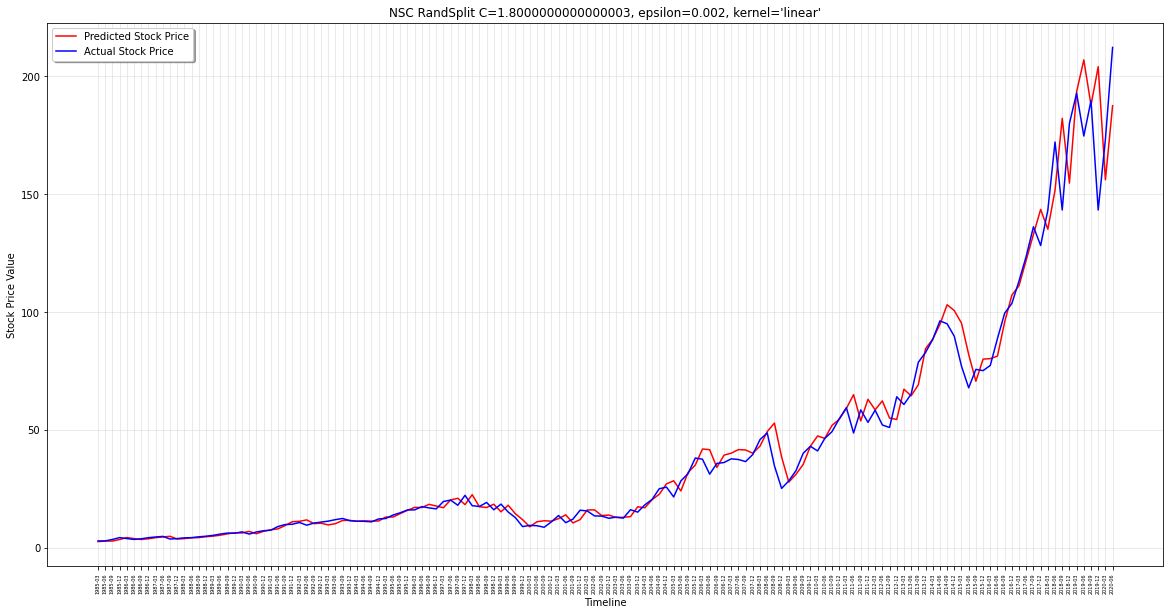

NSC MODEL RESULTS
 RMSE
 	Test: 4.217548344332877
 MAPE
 	Test: 0.09372299367271616
 MAE
 	Test: 2.6507711595917587
 R2 Score Adj
 	Test: 0.9901331102337401



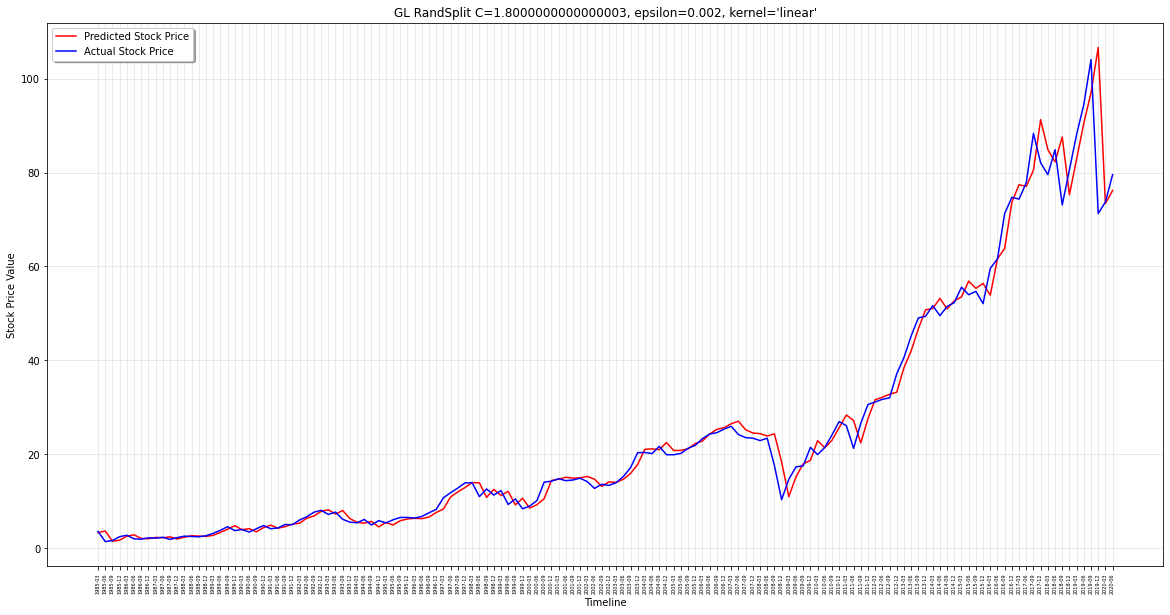

GL MODEL RESULTS
 RMSE
 	Test: 2.156569095657921
 MAPE
 	Test: 0.09825877876018387
 MAE
 	Test: 1.5246850654624367
 R2 Score Adj
 	Test: 0.9912462858186684



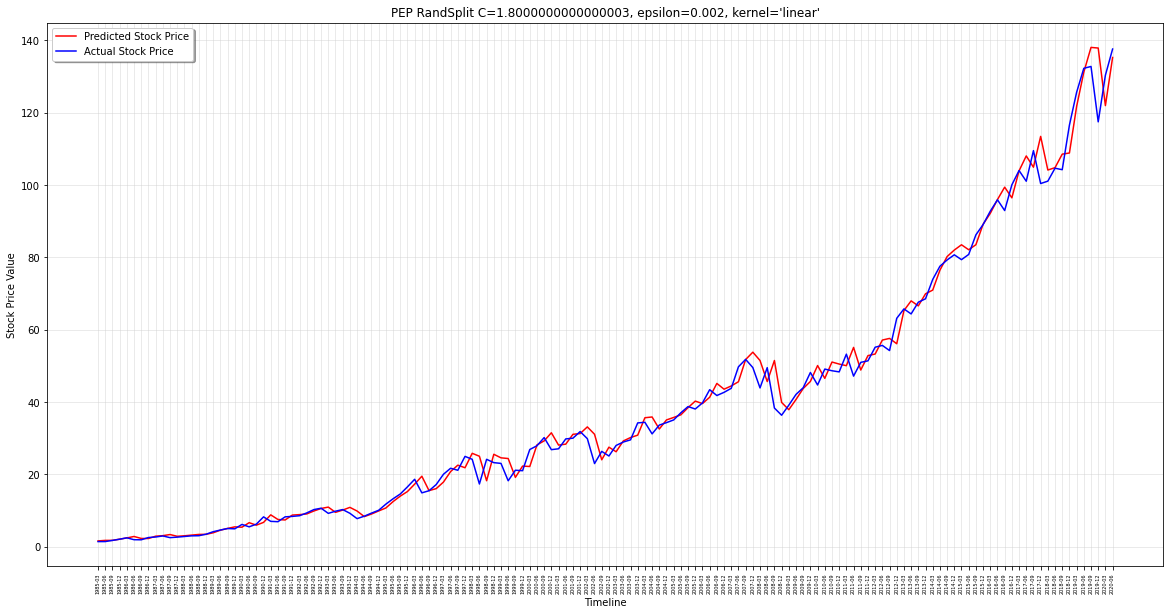

PEP MODEL RESULTS
 RMSE
 	Test: 2.4195055746433183
 MAPE
 	Test: 0.07132137726780353
 MAE
 	Test: 1.6215380493917917
 R2 Score Adj
 	Test: 0.9942376924462106



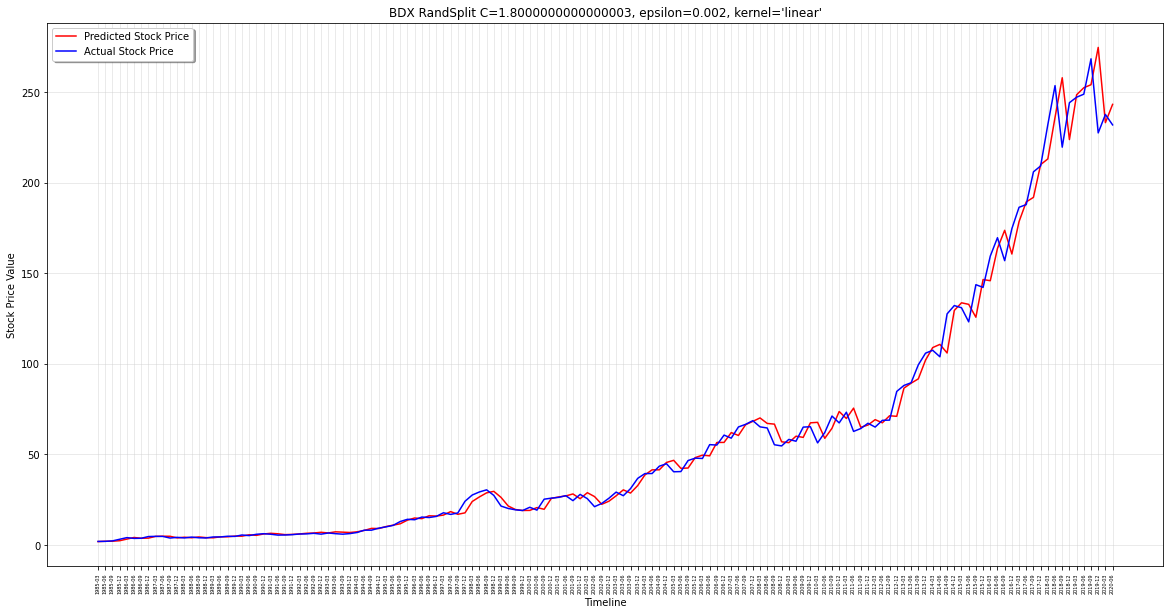

BDX MODEL RESULTS
 RMSE
 	Test: 5.89495408585313
 MAPE
 	Test: 0.07671576586449338
 MAE
 	Test: 3.1032453201690315
 R2 Score Adj
 	Test: 0.9909958380537628



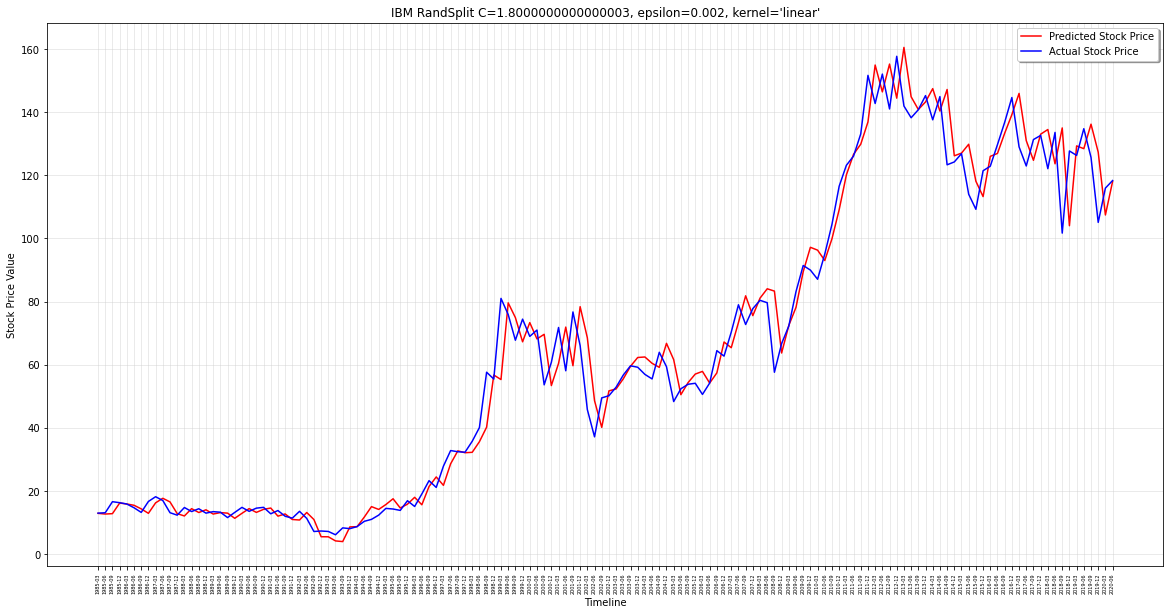

IBM MODEL RESULTS
 RMSE
 	Test: 8.91339280153256
 MAPE
 	Test: 0.13983949852983393
 MAE
 	Test: 6.1241551235763625
 R2 Score Adj
 	Test: 0.9699658220962073



In [9]:
from lib.fundamental_lib import model_results_revised
#Results log
#Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'} #best
Params = {'kernel': 'linear', 'C': 1.8000000000000003, 'epsilon': 0.002}
svr = SVR(**Params)
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], svr, label=stock, scaling=True)

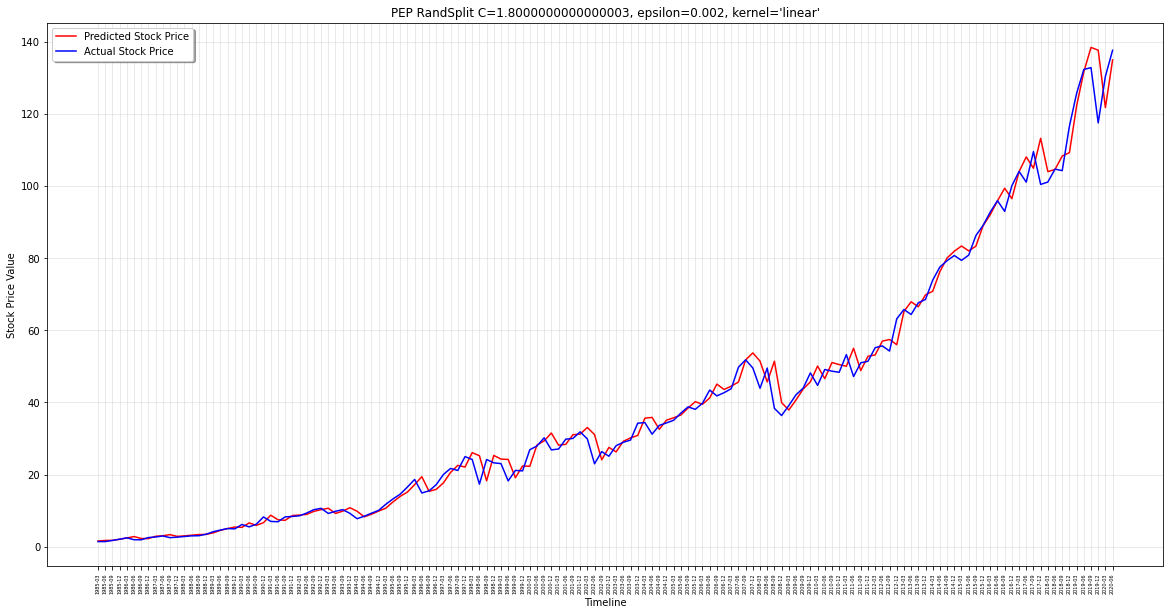

array([  9.86839037,   2.9147588 ,  50.08103718, 103.96822604,
         1.76693674,  67.90439706,  28.16239417,   3.21831856,
        28.39565346,   5.93375897,  52.80518603,  96.49742572,
        19.42942638,  35.76065688,  37.9103837 ,   2.43415639,
         6.69998737,   3.02547366,  15.37081523,  24.30891472,
         9.81890799,  66.53934607,  65.21327896, 122.20874613,
        56.01492199,   1.61655144,   8.79286131,   8.75324246,
        10.82950149])

PEP MODEL RESULTS
 RMSE
 	Test: 2.380229525937752
 MAPE
 	Test: 0.07043381890643419
 MAE
 	Test: 1.5986341601275131
 R2 Score Adj
 	Test: 0.9944232541020418



In [5]:
from lib.fundamental_lib import model_results_revised
#Results log
#Params={'C': 1, 'epsilon': 0.0005, 'gamma': 9e-05, 'kernel': 'linear'} #best
Params = {'kernel': 'linear', 'C': 1.8000000000000003, 'epsilon': 0.002}
svr = SVR(**Params)
test = model_results_revised(datas['PEP'], svr, label='PEP', scaling=True)
test

In [4]:
datos = datas['PEP']['data']['Prediction'].iloc[130:]

In [5]:
datos.values

array([109.52980804, 100.42974091, 101.09339905, 104.67281342,
       104.25828552, 116.58634949, 125.6621933 , 132.29116821,
       132.79995728, 117.48714447, 130.38684082, 137.61959839,
       147.30999756])

In [6]:
from lib.fundamental_lib import backtesting
portfolio = backtesting(datos, 1000)

In [7]:
portfolio

,positions,cash,total
2017-09,0.000000,NaN,NaN
2017-12,0.000000,1000.000000,1000.000000
2018-03,101.093399,898.906601,1000.000000
2018-06,104.672813,898.906601,1003.579414
2018-09,0.000000,1003.164886,1003.164886
2018-12,116.586349,886.578537,1003.164886
2019-03,125.662193,886.578537,1012.240730
2019-06,132.291168,886.578537,1018.869705
2019-09,132.799957,886.578537,1019.378494
2019-12,0.000000,1004.065681,1004.065681


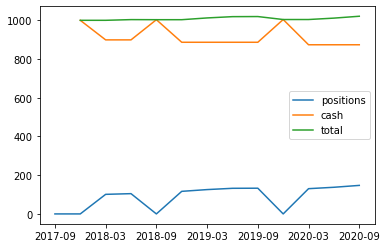

In [8]:
portfolio.plot()
plt.show()